# RDD

Resilient Distributed Dataset

## Create Rdd

In [6]:
# method1 Using parallelize

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Pyspark demo")\
                    .config("a", "b")\
                    .getOrCreate()

rdd = spark.sparkContext.parallelize([(1, 2, 3), (4, 5, 7), (7, 8, "m")]).toDF(["col1", "col2", "col3"])
rdd.show()

+----+----+----+
|col1|col2|col3|
+----+----+----+
|   1|   2|   3|
|   4|   5|   7|
|   7|   8|null|
+----+----+----+



In [7]:
rdd.collect()

[Row(col1=1, col2=2, col3=3),
 Row(col1=4, col2=5, col3=7),
 Row(col1=7, col2=8, col3=None)]

In [11]:
# method2 using createDataFrame

rdd2 = spark.createDataFrame([(1, 2, 3), (4, 5, 6)], ["c1", "c2"])
rdd2.show()

+---+---+---+
| c1| c2| _3|
+---+---+---+
|  1|  2|  3|
|  4|  5|  6|
+---+---+---+



In [12]:
rdd2.printSchema()

root
 |-- c1: long (nullable = true)
 |-- c2: long (nullable = true)
 |-- _3: long (nullable = true)



In [114]:
# method3 using read\load

# from local
# from database
# from hdfs

## Spark Operations

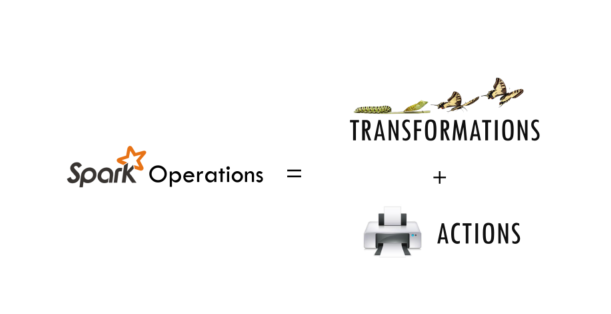

### Transformations

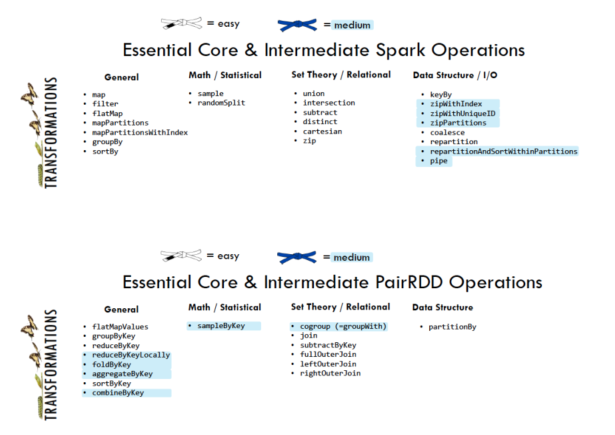

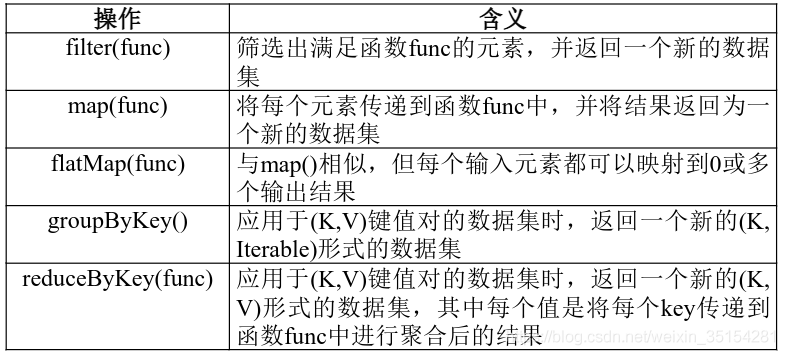

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark create RDD example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

ds = spark.read.format('com.databricks.spark.csv').options(header='true',inferschema='true')\
                    .load(r"D:\data\1.PCA_AntiFraud\creditcard.csv",header=True)

### Actions
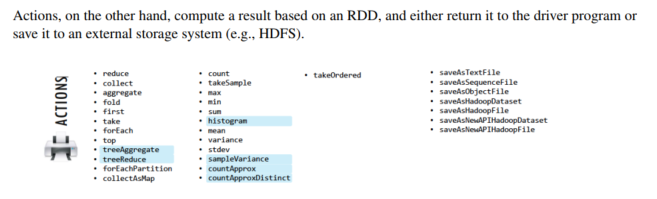

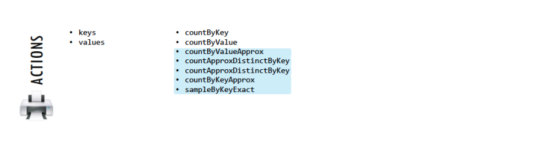

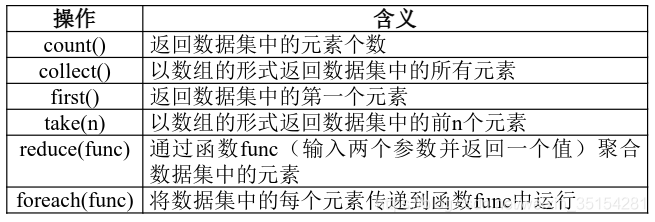

## rdd.DataFrame vs pd.DataFrame

### Create DataFrame

In [15]:
# from list
import pandas as pd

lst = [["a", 1, 2], ["b", 2, 3]]
cn  = ["A", "B", "C"]

display(pd.DataFrame(lst, columns=cn))
display(spark.createDataFrame(lst, cn).show())

,A,B,C
0,a,1,2
1,b,2,3


+---+---+---+
|  A|  B|  C|
+---+---+---+
|  a|  1|  2|
|  b|  2|  3|
+---+---+---+



None

In [17]:
### from dict
import numpy as np
d = {"A":[1, 2], "B":[3, 4]}

display(pd.DataFrame(d))
display(spark.createDataFrame(np.array(list(d.values())).T.tolist(), list(d.keys())).show())

,A,B
0,1,3
1,2,4


+---+---+
|  A|  B|
+---+---+
|  1|  3|
|  2|  4|
+---+---+



None

...

### first n rows

In [20]:
import pandas as pd

lst = [["a", 1, 2], ["b", 2, 3]]
cn  = ["A", "B", "C"]

df = pd.DataFrame(lst, columns=cn)
ds = spark.createDataFrame(lst, cn)

display(ds.show(1))

+---+---+---+
|  A|  B|  C|
+---+---+---+
|  a|  1|  2|
+---+---+---+
only showing top 1 row



None

### columns name & rename columns name

In [21]:
ds.columns

['A', 'B', 'C']

### datatypes

In [22]:
ds.dtypes

[('A', 'string'), ('B', 'bigint'), ('C', 'bigint')]

### cast data types

1. withColumn
2. select
3. selectExpr
4. sql

In [99]:
import pandas as pd

lst = [["1", 1, 2], ["3", 2, 3]]
cn  = ["A", "B", "C"]

df = pd.DataFrame(lst, columns=cn)
ds = spark.createDataFrame(lst, cn)

ds

DataFrame[A: string, B: bigint, C: bigint]

In [113]:
ds1 = ds.withColumn("D", ds["A"].cast("integer"))
ds1

DataFrame[A: string, B: bigint, C: bigint, D: int]

In [111]:
ds2 = ds.select(col("A").cast("int").alias("A"))
ds2

DataFrame[A: int]

### fillna

In [27]:
import pandas as pd

lst = [["a", 1, 2], ["b", 2, None]]
cn  = ["A", "B", "C"]

df = pd.DataFrame(lst, columns=cn)
ds = spark.createDataFrame(lst, cn)

display(ds.show())

+---+---+----+
|  A|  B|   C|
+---+---+----+
|  a|  1|   2|
|  b|  2|null|
+---+---+----+



None

In [28]:
ds.fillna(-99).show()

+---+---+---+
|  A|  B|  C|
+---+---+---+
|  a|  1|  2|
|  b|  2|-99|
+---+---+---+



### replace
### filter
### merge \ join

In [29]:
leftp = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])
rightp = pd.DataFrame({'A': ['A0', 'A1', 'A6', 'A7'],
                        'F': ['B4', 'B5', 'B6', 'B7'],
                        'G': ['C4', 'C5', 'C6', 'C7'],
                        'H': ['D4', 'D5', 'D6', 'D7']},
                        index=[4, 5, 6, 7])
lefts = spark.createDataFrame(leftp)
rights = spark.createDataFrame(rightp)

In [31]:
lefts.join(rights,on='A',how='left').orderBy('A',ascending=True).show()

+---+---+---+---+----+----+----+
|  A|  B|  C|  D|   F|   G|   H|
+---+---+---+---+----+----+----+
| A0| B0| C0| D0|  B4|  C4|  D4|
| A1| B1| C1| D1|  B5|  C5|  D5|
| A2| B2| C2| D2|null|null|null|
| A3| B3| C3| D3|null|null|null|
+---+---+---+---+----+----+----+



### concat

In [112]:
from pyspark.sql import functions as F

lefts.withColumn("concat", F.concat("A", "B")).show()

+---+---+---+---+------+
|  A|  B|  C|  D|concat|
+---+---+---+---+------+
| A0| B0| C0| D0|  A0B0|
| A1| B1| C1| D1|  A1B1|
| A2| B2| C2| D2|  A2B2|
| A3| B3| C3| D3|  A3B3|
+---+---+---+---+------+



### group by

In [36]:
lefts.groupby(["A"]).agg({"B":"min", "C":"max"}).show()

+---+------+------+
|  A|min(B)|max(C)|
+---+------+------+
| A0|    B0|    C0|
| A1|    B1|    C1|
| A2|    B2|    C2|
| A3|    B3|    C3|
+---+------+------+



### pivot

In [41]:
# pandas
pd.pivot_table(data=leftp, index="A", columns="B", values="C", aggfunc="count")

B,B0,B1,B2,B3
A,,,,
A0,1.0,NaN,NaN,NaN
A1,NaN,1.0,NaN,NaN
A2,NaN,NaN,1.0,NaN
A3,NaN,NaN,NaN,1.0


In [46]:
# rdd
lefts.groupBy(["A"]).pivot("B").count().show()

+---+----+----+----+----+
|  A|  B0|  B1|  B2|  B3|
+---+----+----+----+----+
| A2|null|null|   1|null|
| A0|   1|null|null|null|
| A3|null|null|null|   1|
| A1|null|   1|null|null|
+---+----+----+----+----+



### window
### rank vs dense_rank

# DATA EXPLORATION

A journey of a thousand miles begins with a single step

In [54]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark create RDD example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

ds = spark.read.format('com.databricks.spark.csv').options(header='true',inferschema='true')\
                    .load(r"D:\data\1.PCA_AntiFraud\creditcard.csv",header=True)

In [55]:
display(ds.show(1))
ds.printSchema()

+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+----------+-----------+------------+------------+------------+------------+-----------+------------+-----------+----------+----------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+------------+------+-----+
|          V1|          V2|         V3|         V4|         V5|         V6|         V7|         V8|        V9|        V10|         V11|         V12|         V13|         V14|        V15|         V16|        V17|       V18|       V19|        V20|         V21|        V22|        V23|        V24|        V25|         V26|        V27|         V28|Amount|Class|
+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+----------+-----------+------------+------------+------------+------------+-----------+------------+-----------+----------+----------+-----------+------------+-----------+-----------+--

None

root
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nullable = true)
 |-- Amount: double (nul

## describe

In [57]:
ds.select(["V1", "V2"]).describe().show()

+-------+--------------------+--------------------+
|summary|                  V1|                  V2|
+-------+--------------------+--------------------+
|  count|              284807|              284807|
|   mean|1.759749159406528...|-8.24487138892818...|
| stddev|  1.9586958038519555|  1.6513085794832465|
|    min|        -56.40750963|        -72.71572756|
|    max|         2.454929991|         22.05772899|
+-------+--------------------+--------------------+



In [58]:
def describe_pd(df_in, columns, deciles=False):
    '''
    Function to union the basic stats results and deciles
    :param df_in: the input dataframe
    :param columns: the cloumn name list of the numerical variable
    :param deciles: the deciles output
    :return : the numerical describe info. of the input dataframe
    :author: Ming Chen and Wenqiang Feng
    :email: von198@gmail.com
    '''
    if deciles:
        percentiles = np.array(range(0, 110, 10))
    else:
        percentiles = [25, 50, 75]
        percs = np.transpose([np.percentile(df_in.select(x).collect(),percentiles) for x in columns])
        percs = pd.DataFrame(percs, columns=columns)
        percs['summary'] = [str(p) + '%' for p in percentiles]
        spark_describe = df_in.describe().toPandas()
        new_df = pd.concat([spark_describe, percs],ignore_index=True)
        new_df = new_df.round(2)
        
    return new_df[['summary'] + columns]

In [59]:
describe_pd(df,["V1", "V2"])

,summary,V1,V2
0,count,284807,284807
1,mean,1.7597491594065285E-12,-8.244871388928187E-13
2,stddev,1.9586958038519555,1.6513085794832465
3,min,-56.40750963,-72.71572756
4,max,2.454929991,22.05772899
5,25%,-0.920373,-0.59855
6,50%,0.018109,0.065486
7,75%,1.315642,0.803724


## skew, kurtosis

pyspark select的用法比较特殊，可以直接带入函数，对变量进行统计

In [68]:
from pyspark.sql.functions import col, skewness, kurtosis, min, max

var = "V1"
df.select(skewness(var),kurtosis(var)).show()

+-------------------+-----------------+
|       skewness(V1)|     kurtosis(V1)|
+-------------------+-----------------+
|-3.2806500242974663|32.48608809283472|
+-------------------+-----------------+



In [69]:
df.select(max(var), min(var)).show()

+-----------+------------+
|    max(V1)|     min(V1)|
+-----------+------------+
|2.454929991|-56.40750963|
+-----------+------------+



## visualization

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df.select("V1").describe().show()

+-------+--------------------+
|summary|                  V1|
+-------+--------------------+
|  count|              284807|
|   mean|1.759749159406528...|
| stddev|  1.9586958038519555|
|    min|        -56.40750963|
|    max|         2.454929991|
+-------+--------------------+



In [95]:
df.select(var).describe()

DataFrame[summary: string, V1: string]

TypeError: '<' not supported between instances of 'DataFrame' and 'float'

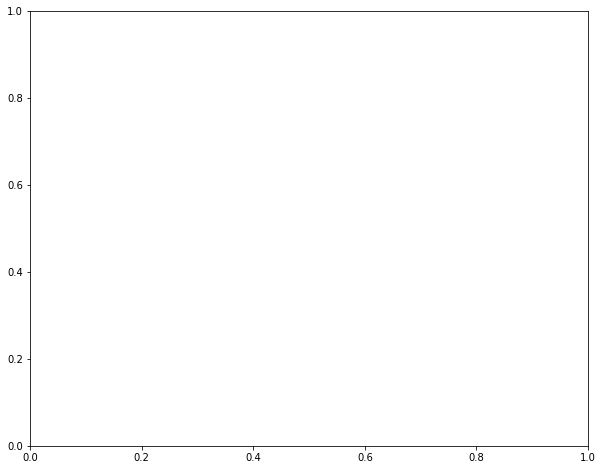

In [96]:
plt.figure(figsize=(10,8))
# the histogram of the data

var = "V1"
x   = df.select(var)
bins = np.arange(-55, 5, 5.0)

plt.hist(x, bins, alpha=0.8, histtype='bar', color='gold', ec='black')
plt.xlabel(var)
plt.ylabel('percentage')
plt.xticks(bins)
plt.show()